# 🧠 What is CNN (Convolutional Neural Network)?

A **Convolutional Neural Network (CNN)** is a type of deep learning algorithm 
commonly used for **image classification, object detection, and computer vision tasks**.

### 🔑 How CNN Works:
1. **Convolution Layer** → Extracts features from the image using filters (edges, textures, shapes).
2. **Pooling Layer** → Reduces the spatial size of the data (keeps important info, removes noise).
3. **Flatten Layer** → Converts 2D data into 1D so it can be passed to fully connected layers.
4. **Fully Connected Layer (Dense Layer)** → Learns complex relationships and does classification.
5. **Output Layer** → Gives prediction (e.g., dog 🐶 or cat 🐱).

---

### ⚙️ What This Code Does in Notebook:
- Imports libraries for deep learning (TensorFlow/Keras).
- Loads dataset (like MNIST or CIFAR).
- Builds CNN model with convolution, pooling, flatten, dense layers.
- Trains the model with training data.
- Evaluates accuracy on test data.

This way, CNN automatically learns to identify patterns in images.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python



  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.6 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.6 MB 1.4 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.6 MB 1.6 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.6 MB 1.8 MB/s eta 0:00:06
   ---------- ----------------------------- 3.4/12.6 MB 1.9 MB/s eta 0:00:05
   ------------- -------------------------- 4.2/12.6 MB 2.1 MB/s eta 0:00:05
   --------------- ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

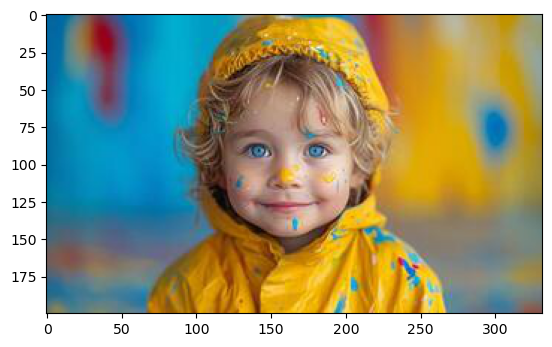

In [20]:
img = image.load_img(r"Training\Happy\4.jpg")
plt.imshow(img)

In [21]:
il = cv2.imread(r"Training\Happy\1.jpg") 

In [22]:
il

array([[[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       ...,

       [[ 25, 120,  75],
        [ 24, 122,  76],
        [ 24, 126,  79],
        ...,
        [  8, 106,  62],
        [ 10, 105,  61],
        [ 13, 103,  60]],

       [[ 25, 120,  75],
        [ 24, 122,  76],
        [ 25, 124,  78],
        ...,
        [  8, 106,  62],
        [ 12, 104,  61],
        [ 14, 103,  60]],

       [[ 26, 121,  76],
        [ 24, 122,  76],
        [ 24, 123,  77],
        ...,
        [ 15, 105,  62],
        [ 16, 105,  62],
        [ 16, 105,  62]]

In [23]:
il.shape

(401, 612, 3)

In [24]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)

In [25]:
train_dataset = train.flow_from_directory('Training',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary') 

Found 12 images belonging to 2 classes.


In [26]:
validation_dataset = validation.flow_from_directory( 'Validation',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary') 

Found 0 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [28]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [29]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

d:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [37]:
model_fit = model.fit(train_dataset,epochs = 15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.2604
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.5000 - loss: 1.5470
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - accuracy: 0.9167 - loss: 0.4496
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step - accuracy: 1.0000 - loss: 0.3636
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - accuracy: 1.0000 - loss: 0.2704
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 1.0000 - loss: 0.2604
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.5833 - loss: 0.6871
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.6667 - loss: 0.4756
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.8333 - loss: 0.3445
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 1.0000 - loss: 0.1568
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step - accuracy: 1.0000 - loss: 0.1127
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 1.0000 - loss:

In [39]:
dir_path = 'Testing'
for i in os.listdir(dir_path):
  print(i)
  #img = image.load_img(dir_path+'//'+i,target_size = (200,200))
 # plt.imshow(img)
 # plt.show()

1.jpg
2.jpg
3.jpg
4.webp
5.webp
6.jpg


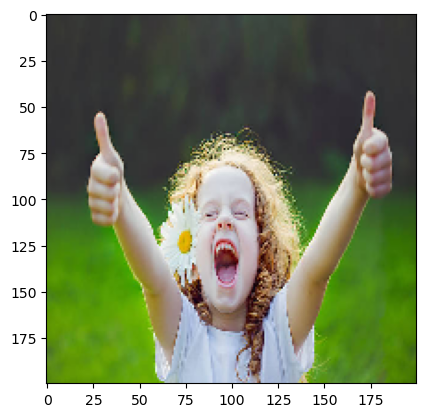

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
I am happy


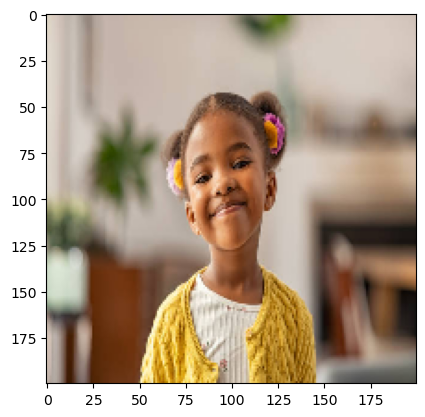

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
I am happy


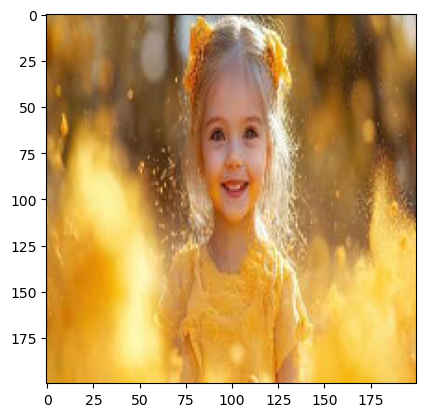

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
I am happy


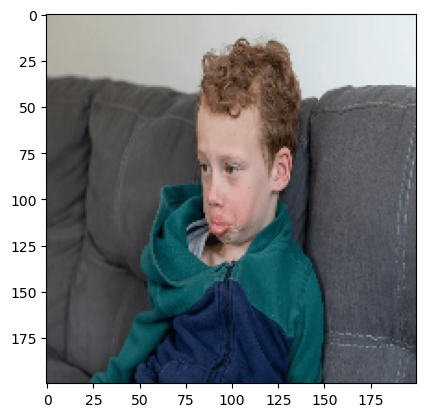

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
I am not happy


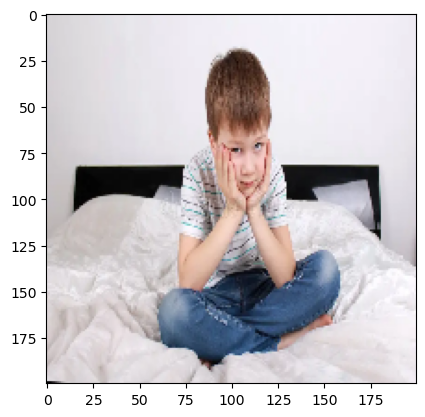

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
I am not happy


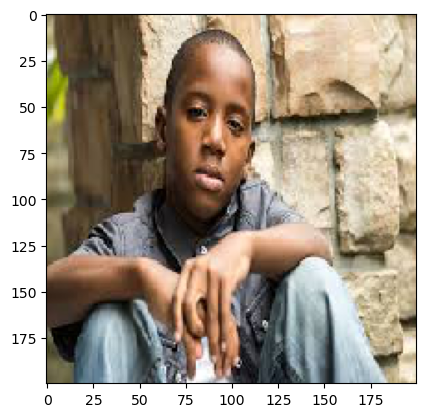

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
I am not happy


In [ ]:
dir_path = 'Testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size = (200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("I am happy")
  else:
    print("I am not happy") 

In [41]:
import pickle
import os

# Save path define karo
save_path = r"C:\Users\adnan\Desktop\cnn\cnn.pkl"

# Agar folder exist nahi hai to bana lo
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# CNN model ko pickle ke through save karo
with open(save_path, "wb") as f:
    pickle.dump(model, f)

print(f"✅ Model saved successfully at: {save_path}")


✅ Model saved successfully at: C:\Users\adnan\Desktop\cnn\cnn.pkl
